# Kirkland Fig. 5.22

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from ase import Atoms
import matplotlib.pyplot as plt

from tensorwaves.waves import ProbeWaves, PrismWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector

In [2]:
L = 2
atoms = Atoms('CSiCuAuU', positions=[(5,25,L/2), (15,25,L/2), (25,25,L/2), (35,25,L/2), (45,25,L/2)], cell=(50,50,L))
potential = Potential(atoms=atoms, gpts=1024, tolerance=1e-3, parametrization='kirkland', num_slices=1)

In [8]:
waves = ProbeWaves(energy=200e3, aperture_cutoff=.01037, defocus = 700, Cs = -1.3e7,)

In [9]:
detector = RingDetector(inner=.04,outer=.2)

scan = waves.linescan(potential, 100, detectors=[detector], start=[0,25], end=[50,25], num_positions=100)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 1/1 


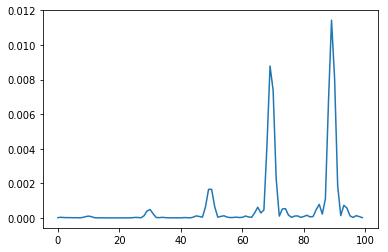

In [10]:
scan.numpy()
plt.plot(scan.numpy())